    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
         

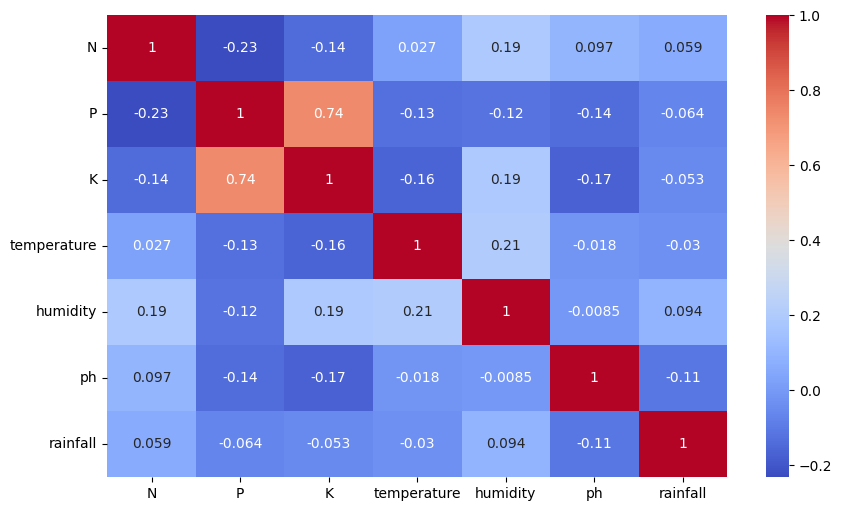

Logistic Regression: 0.9636
Naive Bayes: 0.9955
Support Vector Machine: 0.9682
K-Nearest Neighbors: 0.9568
Decision Tree: 0.9841
Random Forest: 0.9955
Bagging: 0.9886
Gradient Boosting: 0.9818
Best model: Naive Bayes with accuracy: 0.9955
Accuracy on the test set: 0.9955


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import joblib

# Load the dataset
df = pd.read_csv('L_Omesh _ Crop_recommendation.csv')

# EDA
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Visualizations
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['label']).corr(), annot=True, cmap='coolwarm')
plt.show()

# Splitting data into features and target
X = df.drop(columns=['label'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate models
accuracy_scores = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f'{model_name}: {accuracy:.4f}')

# Selecting the best model
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]
print(f'Best model: {best_model_name} with accuracy: {accuracy_scores[best_model_name]:.4f}')

# Save the best model
joblib.dump(best_model, 'model.pkl')

# Predicting with the test set using the best model
y_test_pred = best_model.predict(X_test_scaled)
print(f'Accuracy on the test set: {accuracy_score(y_test, y_test_pred):.4f}')
